<a href="https://colab.research.google.com/github/poorvautturkar25/Ann/blob/main/23uam135_exp_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/

 1733584313696.jpg
 ANN
'ass 1_23UAM135.pdf'
 Classroom
'Colab Notebooks'
'Data Science for Engineers (1).pdf'
'Document from ~Poorva~.pdf'
 IMG-20250116-WA0002.jpg
 IMG-20250116-WA0003.jpg
 IMG-20250116-WA0004.jpg
 IMG-20250116-WA0005.jpg
 IMG-20250116-WA0006.jpg
 IMG-20250116-WA0007.jpg
 IMG-20250116-WA0008.jpg
 IMG-20250116-WA0009.jpg
'IMG-20250116-WA0010 (1).jpg'
 IMG-20250116-WA0010.jpg
 IMG-20250116-WA0011.jpg
 IMG-20250116-WA0012.jpg
 IMG-20250116-WA0013.jpg
 IMG-20250116-WA0014.jpg
'IMG-20250116-WA0015 (1).jpg'
 IMG-20250116-WA0015.jpg
 IMG-20250116-WA0016.jpg
'IMG-20250116-WA0017 (1).jpg'
 IMG-20250116-WA0017.jpg
 IMG-20250116-WA0018.jpg
 IMG-20250116-WA0019.jpg
 IMG-20250116-WA0020.jpg
 IMG-20250116-WA0021.jpg
 IMG-20250116-WA0022.jpg
 mac-protocols.gslides
 Screenshot_2024-12-24-23-52-14-765_com.android.chrome.jpg
 Screenshot_2024-12-24-23-52-34-711_com.android.chrome.jpg
'Screenshot_2025-02-10-16-33-34-921_com (1).android.chrome.jpg'
 Screenshot_2025-02-10-16-33-34-921_com.

In [ ]:
!ls /content/drive/MyDrive/ANN/

Student_dataset.xlsx


In [ ]:
!ls /content/drive/MyDrive/ANN/Student_dataset.xlsx

/content/drive/MyDrive/ANN/Student_dataset.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#importing data set
df = pd.read_excel("/content/drive/MyDrive/ANN/Student_dataset.xlsx",engine = 'openpyxl')
print(df)

   CGPA  10th Score  12th Score   IQ  Placement
0   8.5          85          88  120          1
1   7.2          78          74  110          0
2   9.1          90          92  130          1
3   6.8          70          65  105          0
4   7.5          75          78  115          0
5   8.0          80          81  118          1
6   7.9          79          77  113          1
7   8.3          83          85  125          1
8   6.5          65          60  100          0
9   9.0          92          95  135          1


In [ ]:
df = pd.DataFrame(df)

In [ ]:
Data = df [['12th Score','IQ']]
Data

,12th Score,IQ
0,88,120
1,74,110
2,92,130
3,65,105
4,78,115
5,81,118
6,77,113
7,85,125
8,60,100
9,95,135


In [ ]:
x = Data[['12th Score']].values
x

array([[88],
       [74],
       [92],
       [65],
       [78],
       [81],
       [77],
       [85],
       [60],
       [95]])

In [ ]:
x = np.c_[np.ones(x.shape[0]), x]

In [ ]:
y = Data['IQ'].values.reshape(-1, 1)
y

array([[120],
       [110],
       [130],
       [105],
       [115],
       [118],
       [113],
       [125],
       [100],
       [135]])

In [ ]:
w = np.zeros((2,1))
epochs = 1000
lr = 0.0001

In [ ]:
for epoch in range (epochs):
        y_predict = x @ w
        error = y_predict - y
        cost = (1/(2 * len(y))) * np.sum(error ** 2)
        gradient = (x.T @ error) / len(y)
        w -= lr * gradient


In [ ]:
y_predict = x @ w
print("\nPredicted IQ values:\n", y_predict)


Predicted IQ values:
 [[128.79742304]
 [108.32149485]
 [134.64768824]
 [ 95.15839816]
 [114.17176005]
 [118.55945895]
 [112.70919375]
 [124.40972414]
 [ 87.84556667]
 [139.03538714]]


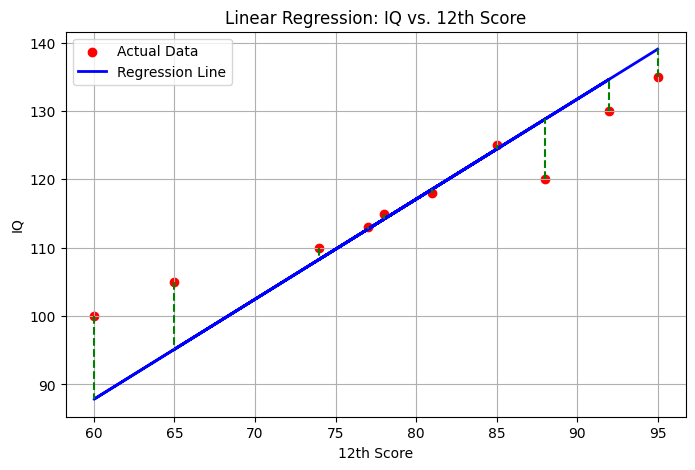

Final Bias (b): 0.09158871828983584
Final Weight (w): 1.46256629913231


In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['12th Score'], df['IQ'], color='red', label="Actual Data")
plt.plot(df['12th Score'], y_predict, color='blue', linewidth=2, label="Regression Line")

for i in range(len(df)):
    plt.plot([df['12th Score'][i], df['12th Score'][i]], [y[i], y_predict[i]], 'g--')

# Labels and title
plt.xlabel("12th Score")
plt.ylabel("IQ")
plt.title("Linear Regression: IQ vs. 12th Score")
plt.legend()
plt.grid()
plt.show()

# Print final results
print("Final Bias (b):", w[0][0])  # Bias term
print("Final Weight (w):", w[1][0])  # Coefficient